In [1]:
import os
workingDirInit = os.getcwd()
workingDir = workingDirInit
parentDir = ((os.path.dirname(os.path.dirname(os.path.abspath(''))))) # ../../../
print('working dir ' + workingDir)
print('path dir ' + parentDir)

working dir C:\Users\l.corzo\source\repos\MS_RCPSP\Notebooks\RCPSPtutorials
path dir C:\Users\l.corzo\source\repos\MS_RCPSP


In [2]:
import sys
sys.path
sys.path.append(parentDir)
print(sys.path)

['C:\\Users\\l.corzo\\source\\repos\\MS_RCPSP\\Notebooks\\RCPSPtutorials', 'C:\\Users\\l.corzo\\Anaconda3\\envs\\rcpsp_code_env\\python38.zip', 'C:\\Users\\l.corzo\\Anaconda3\\envs\\rcpsp_code_env\\DLLs', 'C:\\Users\\l.corzo\\Anaconda3\\envs\\rcpsp_code_env\\lib', 'C:\\Users\\l.corzo\\Anaconda3\\envs\\rcpsp_code_env', '', 'C:\\Users\\l.corzo\\Anaconda3\\envs\\rcpsp_code_env\\lib\\site-packages', 'C:\\Users\\l.corzo\\Anaconda3\\envs\\rcpsp_code_env\\lib\\site-packages\\win32', 'C:\\Users\\l.corzo\\Anaconda3\\envs\\rcpsp_code_env\\lib\\site-packages\\win32\\lib', 'C:\\Users\\l.corzo\\Anaconda3\\envs\\rcpsp_code_env\\lib\\site-packages\\Pythonwin', 'C:\\Users\\l.corzo\\source\\repos\\MS_RCPSP']


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [4]:
# %run -i "rcpsp_calendar_examples.py"
import logging
import os
import glob
import time
import nest_asyncio
from skdecide import rollout_episode
from skdecide.hub.solver.do_solver.do_solver_scheduling import (
    BasePolicyMethod, DOSolver, PolicyMethodParams, SolvingMethod)
from skdecide.hub.solver.do_solver.sk_to_do_binding import \
    from_last_state_to_solution

from Code.parser_calendar import load_domain
from Code.rcpsp_calendar import parse_file
from Code.rcpsp_calendar_utils import (plot_resource_individual_gantt,
                                       plot_ressource_view, plot_task_gantt,
                                       save_task_gantt_resolution)
from Code.rcpsp_datasets import get_complete_path

from discrete_optimization.generic_tools.ea.ga import (
    DeapCrossover,
    DeapMutation,
    Ga,
    ObjectiveHandling,
)


nest_asyncio.apply()


logging.basicConfig(level=logging.INFO)

fig1 =None
fig2 =None
fig3 =None

In [5]:
# def do_singlemode_ga_calendar(file_name):
#     global fig1, fig2, fig3
file_name = "j301_1_calendar.sm"
problem = parse_file(get_complete_path(file_name))

mutation = DeapMutation.MUT_SHUFFLE_INDEXES
crossover = DeapCrossover.CX_UNIFORM_PARTIALY_MATCHED
ga_solver = Ga(
    problem,
    encoding="rcpsp_permutation",
    objective_handling=ObjectiveHandling.AGGREGATE,
    objectives=["makespan"],
    objective_weights=[-1],
    pop_size=50,
    max_evals=300,
    mut_rate=0.1,
    crossover_rate=0.9,
    crossover=crossover,
    mutation=mutation,
)
results_ga = ga_solver.solve()
solution = results_ga.get_best_solution_fit()
solution_gantt_df = save_task_gantt_resolution(problem, solution[0])
print(solution_gantt_df)


C:\Users\l.corzo\Anaconda3\envs\rcpsp_code_env\lib\site-packages\discrete_optimization\rcpsp\fast_function_rcpsp.py:100: NumbaTypeSafetyWarning: unsafe cast from int64 to int32. Precision may be lost.
  minimum_starting_time[permutation_task[j]] = max(


gen	nevals	avg  	std    	min	max
0  	0     	-71.3	7.41687	-94	-58
1  	48    	-66  	7.24707	-94	-58
2  	46    	-63.84	6.18501	-86	-58
3  	50    	-63.2 	4.57384	-74	-58
4  	48    	-63.68	6.1788 	-83	-58
5  	48    	-62   	4.83735	-77	-58
6  	46    	-60.12	3.17893	-69	-58
[[ 4.  0.  4. 10.  0.  0. 10. 10.  0.  0.  0.  0.  0. 23.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0. 11. 11. 12. 12. 12. 10.  4.  4.  3.  3.  3.  3.
   3.  3.  3.  3.  3.  0.  0.  2.  2.  2.  2.  2.  6.  6.  7.  3.  0.  0.
   0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.
   1.  1.  1.  1.  1.  1.  8.  8.  1.  7.  7.  7.  8.  8. 13. 12. 12. 12.
  12.  5.  5.  5.  5. 10. 10. 10. 10. 10. 10. 10.  8.  8.  8.  0.  9.  9.
   9.  0.  7.  7.  0.]
 [ 0.  0.  0.  2.  0.  0.  2.  2.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  4.  4.  4.  4.  4.  4.  4.  0.  0.  0.  2.  2.  0.
   0.  0.  0.  0.  

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


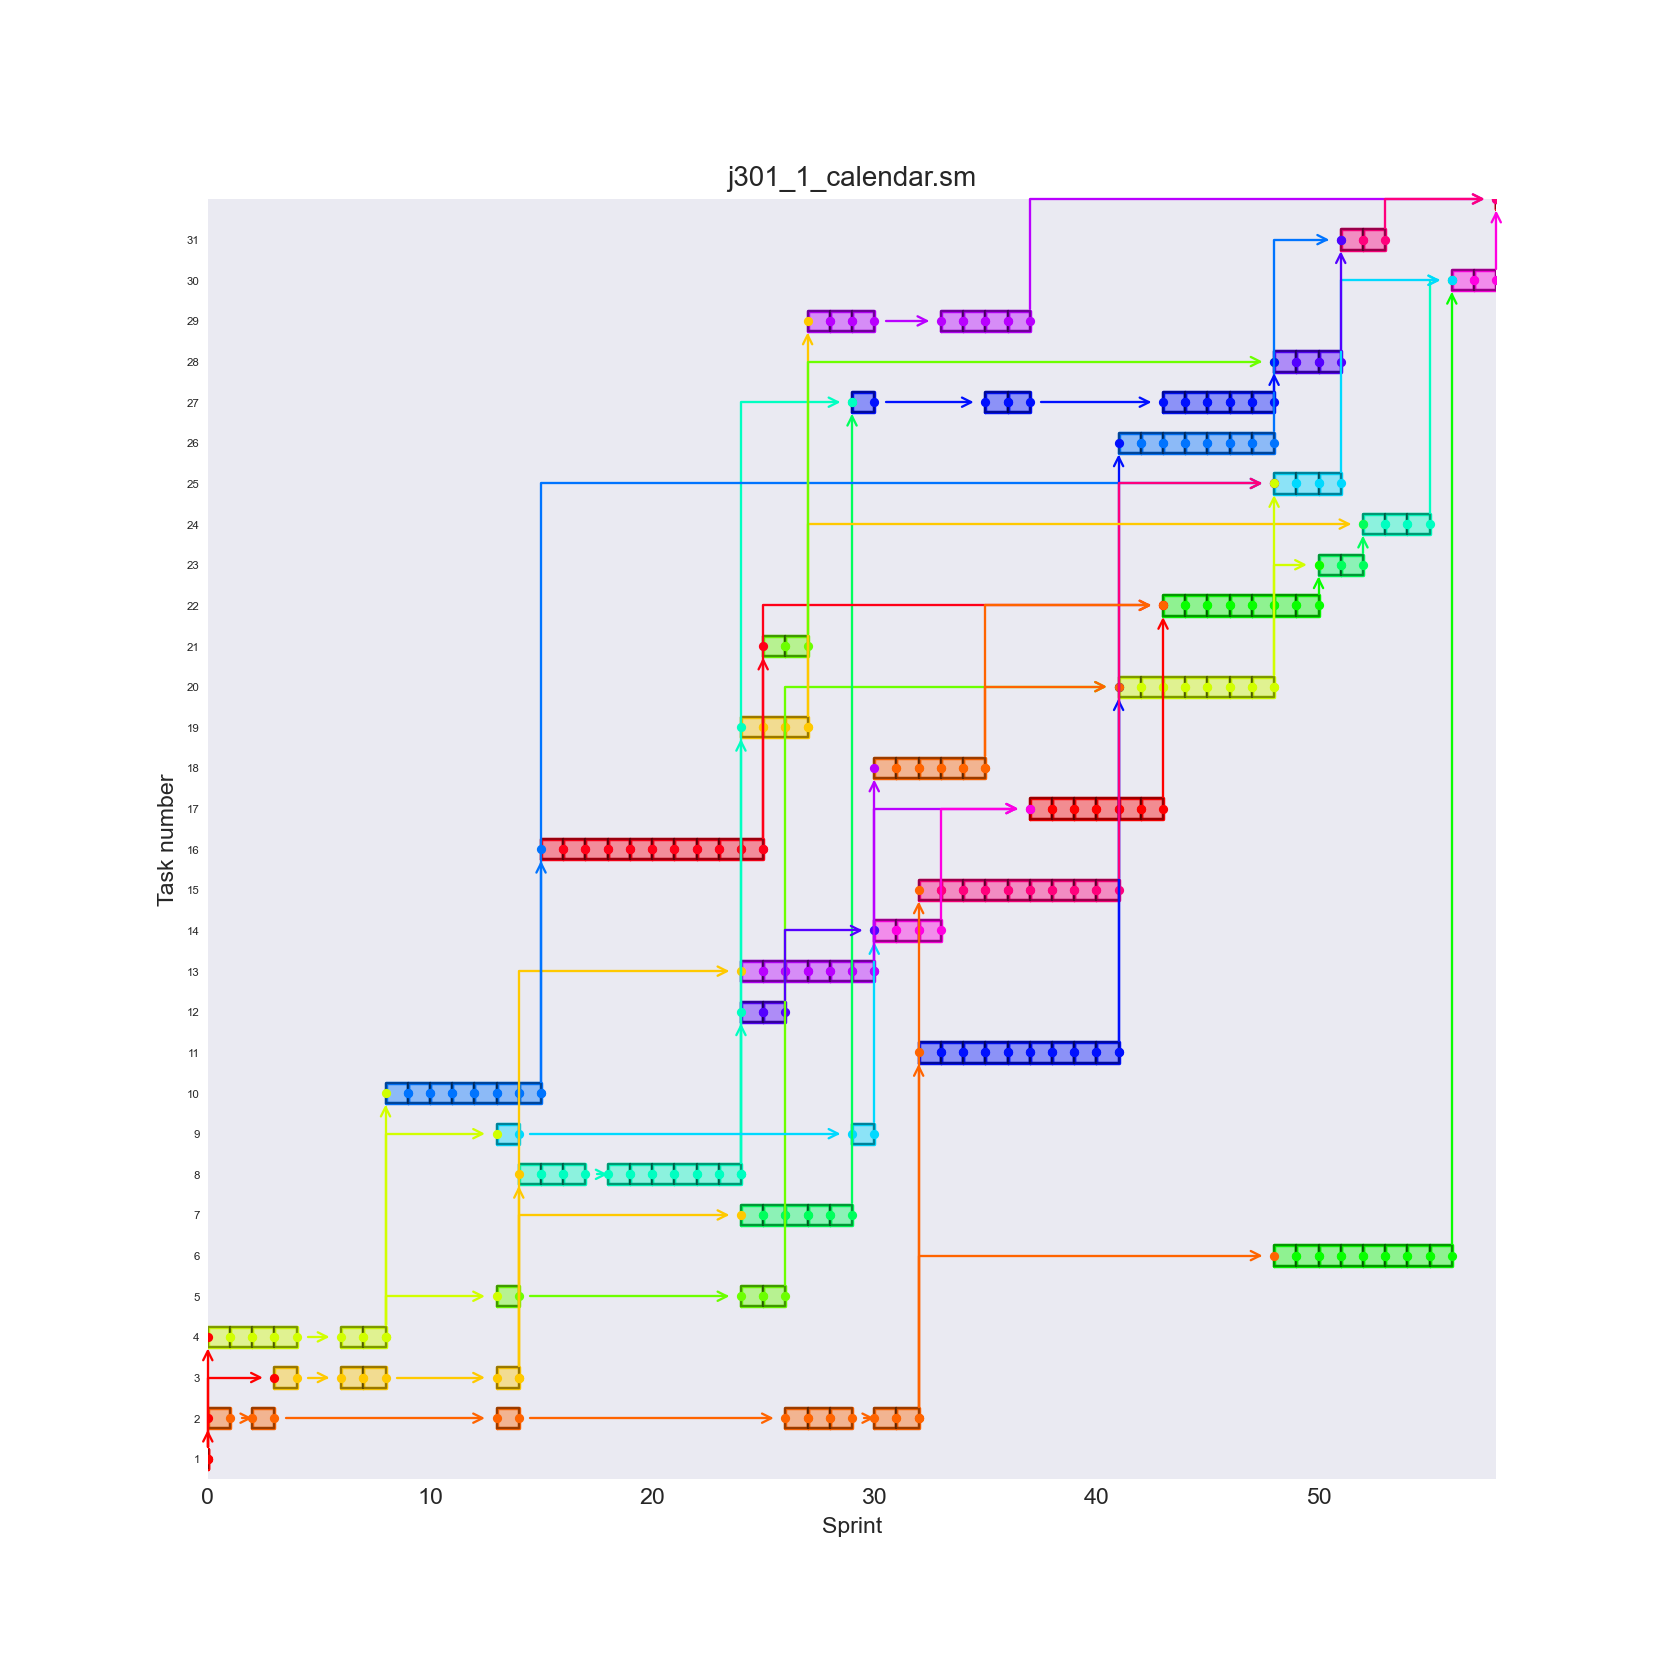

In [7]:
%matplotlib notebook
fig1 = plot_task_gantt(problem, solution[0], title=file_name, fig=fig1)

<IPython.core.display.Javascript object>


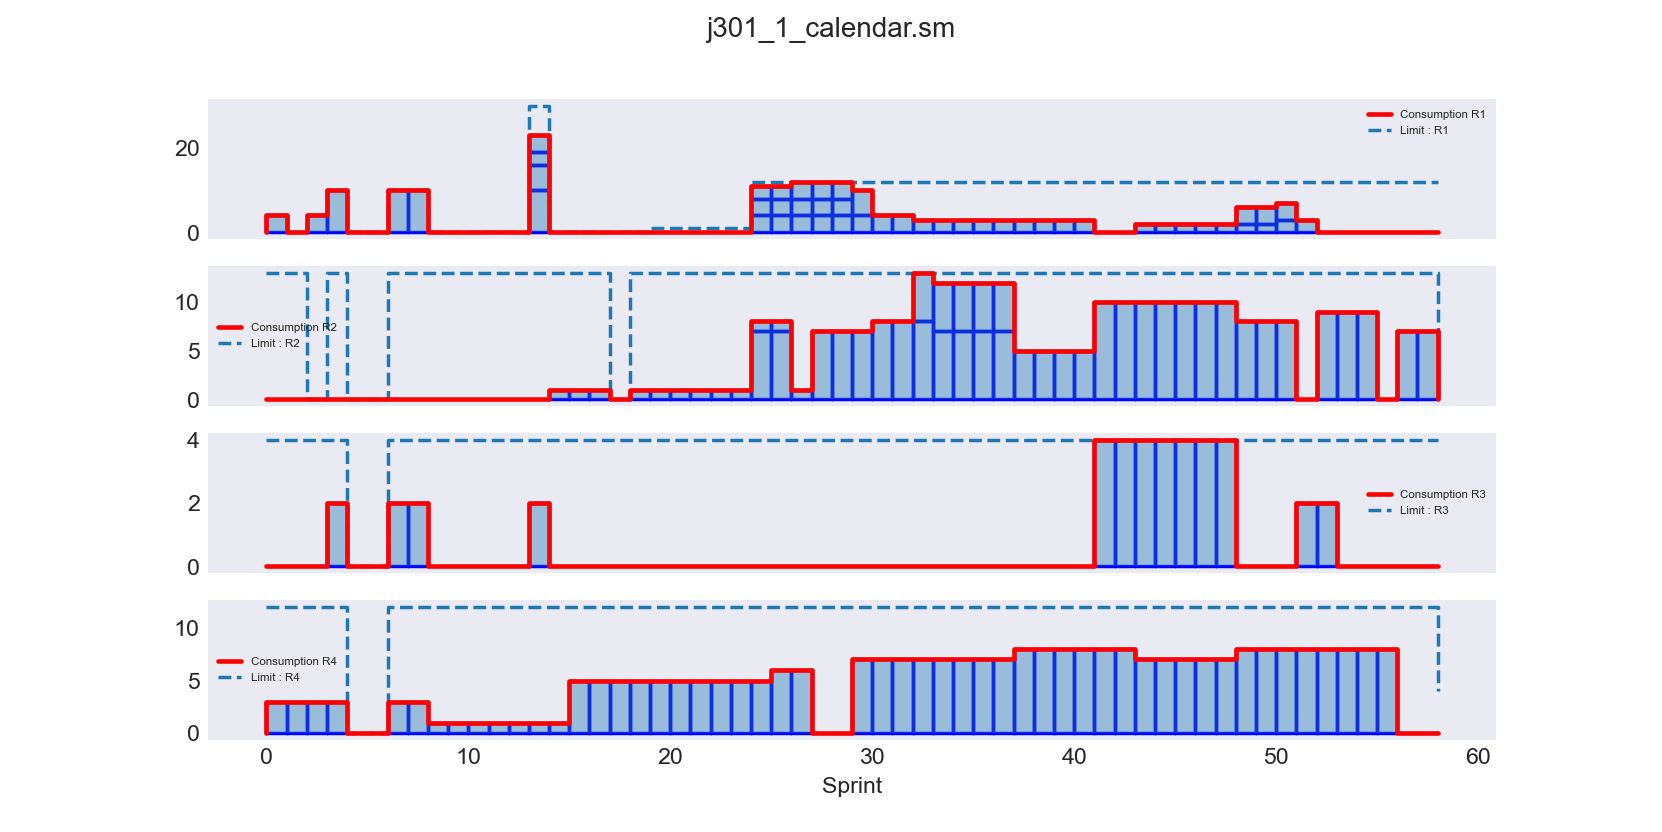

C:\Users\l.corzo\Anaconda3\envs\rcpsp_code_env\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


In [8]:
%matplotlib notebook
# Create the figure and axis
fig2 = plot_ressource_view(problem, solution[0],
                           title_figure=file_name,
                           fig=fig2)


<IPython.core.display.Javascript object>


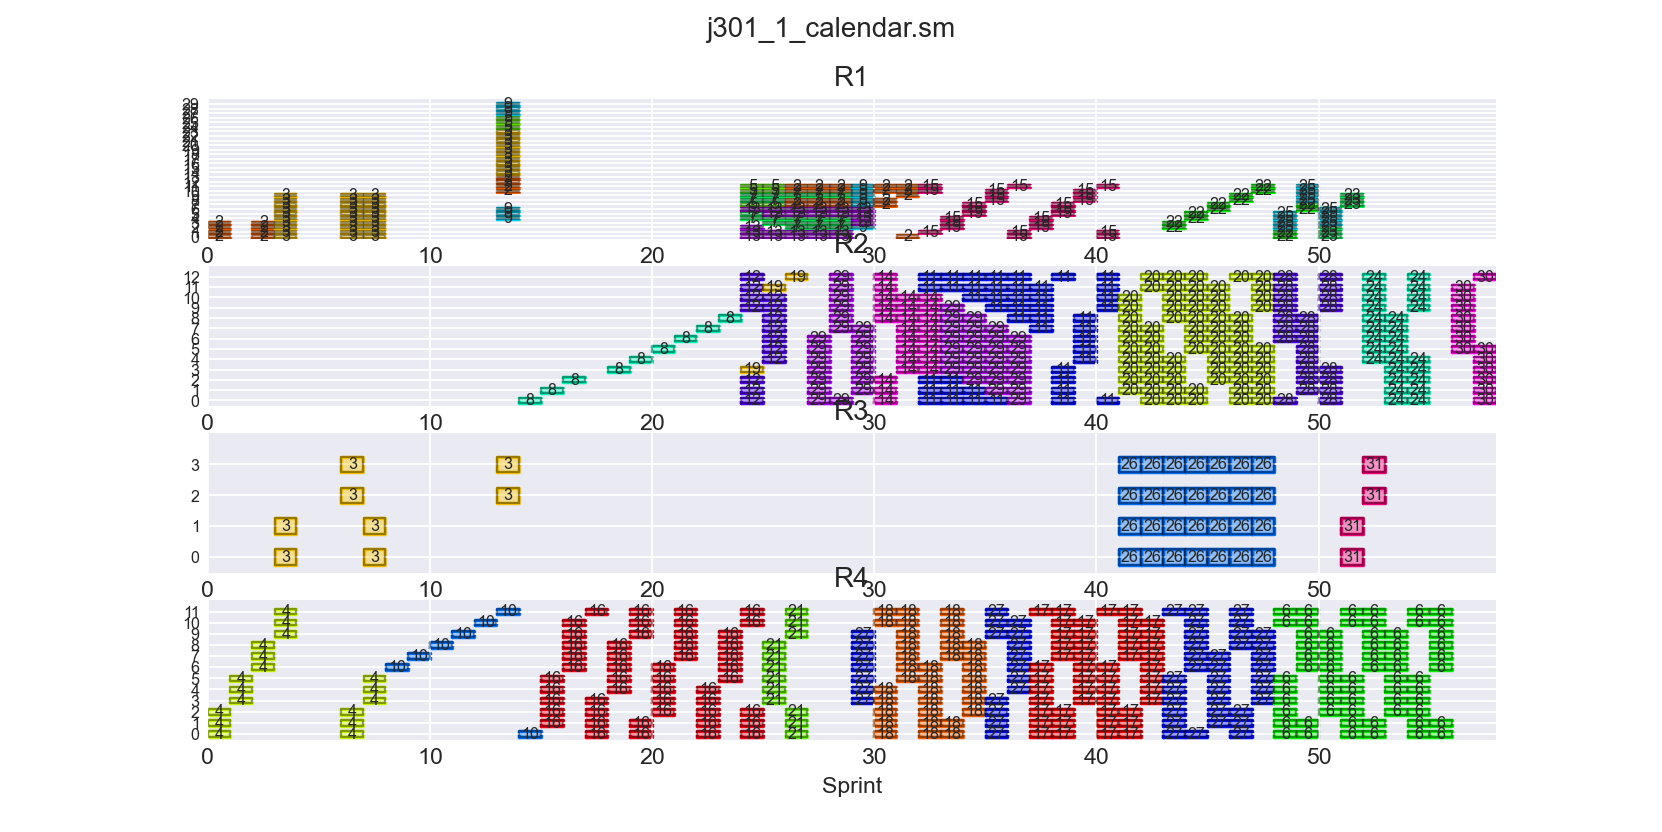

'>' not supported between instances of 'float' and 'list'
'>' not supported between instances of 'float' and 'list'
'>' not supported between instances of 'float' and 'list'
'>' not supported between instances of 'float' and 'list'


In [9]:
%matplotlib notebook
fig3 = plot_resource_individual_gantt(problem, solution[0],
                                      title_figure=file_name,
                                      fig=fig3)


In [10]:
fig3.savefig("filepath.svg", format = 'svg', dpi=3000)

In [11]:
from Code.rcpsp_calendar_utils import plot_task_gantt_plotly

fig4 = plot_task_gantt_plotly(problem, solution[0])


ValueError: Invalid property specified for object of type plotly.graph_objs.layout.Shape: 'marker'

Did you mean "layer"?

    Valid properties:
        editable
            Determines whether the shape could be activated for
            edit or not. Has no effect when the older editable
            shapes mode is enabled via `config.editable` or
            `config.edits.shapePosition`.
        fillcolor
            Sets the color filling the shape's interior. Only
            applies to closed shapes.
        fillrule
            Determines which regions of complex paths constitute
            the interior. For more info please visit
            https://developer.mozilla.org/en-
            US/docs/Web/SVG/Attribute/fill-rule
        layer
            Specifies whether shapes are drawn below or above
            traces.
        line
            :class:`plotly.graph_objects.layout.shape.Line`
            instance or dict with compatible properties
        name
            When used in a template, named items are created in the
            output figure in addition to any items the figure
            already has in this array. You can modify these items
            in the output figure by making your own item with
            `templateitemname` matching this `name` alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). Has no effect outside of a
            template.
        opacity
            Sets the opacity of the shape.
        path
            For `type` "path" - a valid SVG path with the pixel
            values replaced by data values in
            `xsizemode`/`ysizemode` being "scaled" and taken
            unmodified as pixels relative to `xanchor` and
            `yanchor` in case of "pixel" size mode. There are a few
            restrictions / quirks only absolute instructions, not
            relative. So the allowed segments are: M, L, H, V, Q,
            C, T, S, and Z arcs (A) are not allowed because radius
            rx and ry are relative. In the future we could consider
            supporting relative commands, but we would have to
            decide on how to handle date and log axes. Note that
            even as is, Q and C Bezier paths that are smooth on
            linear axes may not be smooth on log, and vice versa.
            no chained "polybezier" commands - specify the segment
            type for each one. On category axes, values are numbers
            scaled to the serial numbers of categories because
            using the categories themselves there would be no way
            to describe fractional positions On data axes: because
            space and T are both normal components of path strings,
            we can't use either to separate date from time parts.
            Therefore we'll use underscore for this purpose:
            2015-02-21_13:45:56.789
        templateitemname
            Used to refer to a named item in this array in the
            template. Named items from the template will be created
            even without a matching item in the input figure, but
            you can modify one by making an item with
            `templateitemname` matching its `name`, alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). If there is no template or no
            matching item, this item will be hidden unless you
            explicitly show it with `visible: true`.
        type
            Specifies the shape type to be drawn. If "line", a line
            is drawn from (`x0`,`y0`) to (`x1`,`y1`) with respect
            to the axes' sizing mode. If "circle", a circle is
            drawn from ((`x0`+`x1`)/2, (`y0`+`y1`)/2)) with radius
            (|(`x0`+`x1`)/2 - `x0`|, |(`y0`+`y1`)/2 -`y0`)|) with
            respect to the axes' sizing mode. If "rect", a
            rectangle is drawn linking (`x0`,`y0`), (`x1`,`y0`),
            (`x1`,`y1`), (`x0`,`y1`), (`x0`,`y0`) with respect to
            the axes' sizing mode. If "path", draw a custom SVG
            path using `path`. with respect to the axes' sizing
            mode.
        visible
            Determines whether or not this shape is visible.
        x0
            Sets the shape's starting x position. See `type` and
            `xsizemode` for more info.
        x1
            Sets the shape's end x position. See `type` and
            `xsizemode` for more info.
        xanchor
            Only relevant in conjunction with `xsizemode` set to
            "pixel". Specifies the anchor point on the x axis to
            which `x0`, `x1` and x coordinates within `path` are
            relative to. E.g. useful to attach a pixel sized shape
            to a certain data value. No effect when `xsizemode` not
            set to "pixel".
        xref
            Sets the shape's x coordinate axis. If set to a x axis
            id (e.g. "x" or "x2"), the `x` position refers to a x
            coordinate. If set to "paper", the `x` position refers
            to the distance from the left of the plotting area in
            normalized coordinates where 0 (1) corresponds to the
            left (right). If set to a x axis ID followed by
            "domain" (separated by a space), the position behaves
            like for "paper", but refers to the distance in
            fractions of the domain length from the left of the
            domain of that axis: e.g., *x2 domain* refers to the
            domain of the second x  axis and a x position of 0.5
            refers to the point between the left and the right of
            the domain of the second x axis.
        xsizemode
            Sets the shapes's sizing mode along the x axis. If set
            to "scaled", `x0`, `x1` and x coordinates within `path`
            refer to data values on the x axis or a fraction of the
            plot area's width (`xref` set to "paper"). If set to
            "pixel", `xanchor` specifies the x position in terms of
            data or plot fraction but `x0`, `x1` and x coordinates
            within `path` are pixels relative to `xanchor`. This
            way, the shape can have a fixed width while maintaining
            a position relative to data or plot fraction.
        y0
            Sets the shape's starting y position. See `type` and
            `ysizemode` for more info.
        y1
            Sets the shape's end y position. See `type` and
            `ysizemode` for more info.
        yanchor
            Only relevant in conjunction with `ysizemode` set to
            "pixel". Specifies the anchor point on the y axis to
            which `y0`, `y1` and y coordinates within `path` are
            relative to. E.g. useful to attach a pixel sized shape
            to a certain data value. No effect when `ysizemode` not
            set to "pixel".
        yref
            Sets the shape's y coordinate axis. If set to a y axis
            id (e.g. "y" or "y2"), the `y` position refers to a y
            coordinate. If set to "paper", the `y` position refers
            to the distance from the bottom of the plotting area in
            normalized coordinates where 0 (1) corresponds to the
            bottom (top). If set to a y axis ID followed by
            "domain" (separated by a space), the position behaves
            like for "paper", but refers to the distance in
            fractions of the domain length from the bottom of the
            domain of that axis: e.g., *y2 domain* refers to the
            domain of the second y  axis and a y position of 0.5
            refers to the point between the bottom and the top of
            the domain of the second y axis.
        ysizemode
            Sets the shapes's sizing mode along the y axis. If set
            to "scaled", `y0`, `y1` and y coordinates within `path`
            refer to data values on the y axis or a fraction of the
            plot area's height (`yref` set to "paper"). If set to
            "pixel", `yanchor` specifies the y position in terms of
            data or plot fraction but `y0`, `y1` and y coordinates
            within `path` are pixels relative to `yanchor`. This
            way, the shape can have a fixed height while
            maintaining a position relative to data or plot
            fraction.
        
Did you mean "layer"?

Bad property path:
marker
^^^^^^

In [ ]:
fig4